In [1]:
from modeling_utils import create_fully_connected_architecture_for_amplitude_and_phase_reconstruction, \
                           compile_model, \
                           train_model, \
                           store_model

from configurations import PSFSimpleFCModel as ModelConfig

from plot_utils import plot_amplitude_phase_fully_connected_prediction_from_electric_field, \
                       plot_model_history

2024-03-04 12:27:37.008334: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-04 12:27:37.180632: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-04 12:27:37.180709: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-04 12:27:37.183427: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-04 12:27:37.197139: I tensorflow/core/platform/cpu_feature_guar

In [2]:
import numpy as np

input_array = np.load("a4.npy")
output_array = np.load("a3_processed.npy")

In [3]:
input_array

array([[ 402.0735  ,  865.972   , 2082.5496  ,  600.67975 ,  466.00436 ,
        1221.3601  , 1625.6688  , 1344.2157  ,  555.9367  ,  244.3268  ,
         678.3474  ,   82.00994 ,   33.857132,  900.7539  ,  368.4654  ,
          14.988673,  591.9618  ,   18.567717,  382.33795 ]],
      dtype=float32)

In [4]:
output_array

array([[-0.00879117, -0.00947505, -0.0093857 , ...,  0.01833416,
         0.02424422,  0.02821683]], dtype=float32)

In [5]:
model_configuration = ModelConfig()
print(model_configuration.get_description())


	=== TestWith1DataPoint ===
	*ARCHITECTURE HYPERPARAMETERS:
		-Fully Connected
		-Input shape: 19
		-Output shape: 32768
		-Hidden layers: [128, 128, 128, 128, 256, 256, 512, 2000, 4000]
		-Regularizer: None
		-Hidden Layers Activation: relu
		-Output Layer Activation: linear
		-Batch Normalization: False
		-Dropout: False, 0.2
	
	*COMPILATION HYPERPARAMETERS:
		-Optimizer: ADAM lr=0.001, beta_1=0.9, beta_2=0.999
		-Loss Function: MSE
		-Metric: MSE
	
	*TRAINING HYPERPARAMETERS:
		-Epochs: 10000
		-Batch size: 1
		-Callbacks: 
			-ReduceLROnPlateau: MSE 10 x0.1
			-Early Stop: MSE 25
	


2024-03-04 12:27:40.974990: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-04 12:27:41.115066: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-04 12:27:41.115602: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [6]:
model = create_fully_connected_architecture_for_amplitude_and_phase_reconstruction(
    *model_configuration.unpack_architecture_hyperparameters()
)

Model: "TestWith1DataPoint"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               2432      
                                                                 
 activation (Activation)     (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               16384     
                                                                 
 activation_1 (Activation)   (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               16384     
                                                                 
 activation_2 (Activation)   (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 128)        

In [7]:
compile_model(
    model,
    *model_configuration.unpack_compilation_hyperparameters()
)

In [8]:
import numpy as np
history = train_model(
    model,
    input_array,
    output_array,
    input_array,
    output_array,
    *model_configuration.unpack_training_hyperparameters()
)

Epoch 1/10000


2024-03-04 12:27:43.593203: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-03-04 12:27:44.583527: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f43c1e17f10 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-03-04 12:27:44.583562: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 4070 Laptop GPU, Compute Capability 8.9
2024-03-04 12:27:44.591908: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-03-04 12:27:44.615904: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
I0000 00:00:1709515664.935783   36488 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1/1 [==============================] - 5s 5s/step - loss: 10.6441 - mean_squared_error: 10.6441 - val_loss: 2.0363 - val_mean_squared_error: 2.0363 - lr: 0.0010
Epoch 2/10000
1/1 [==============================] - 0s 96ms/step - loss: 2.0363 - mean_squared_error: 2.0363 - val_loss: 0.1088 - val_mean_squared_error: 0.1088 - lr: 0.0010
Epoch 3/10000
1/1 [==============================] - 0s 139ms/step - loss: 0.1088 - mean_squared_error: 0.1088 - val_loss: 0.0525 - val_mean_squared_error: 0.0525 - lr: 0.0010
Epoch 4/10000
1/1 [==============================] - 0s 161ms/step - loss: 0.0525 - mean_squared_error: 0.0525 - val_loss: 0.0333 - val_mean_squared_error: 0.0333 - lr: 0.0010
Epoch 5/10000
1/1 [==============================] - 0s 163ms/step - loss: 0.0333 - mean_squared_error: 0.0333 - val_loss: 0.0280 - val_mean_squared_error: 0.0280 - lr: 0.0010
Epoch 6/10000
1/1 [==============================] - 0s 162ms/step - loss: 0.0280 - mean_squared_error: 0.0280 - val_loss: 0.0233 - val_

In [9]:
store_model(model,
            model.name,
            model_configuration.get_description(),
            history.history['mean_squared_error'][-1],
            history.history['val_mean_squared_error'][-1],
            psf_model=True)

1/1 [==============================] - 0s 107ms/step


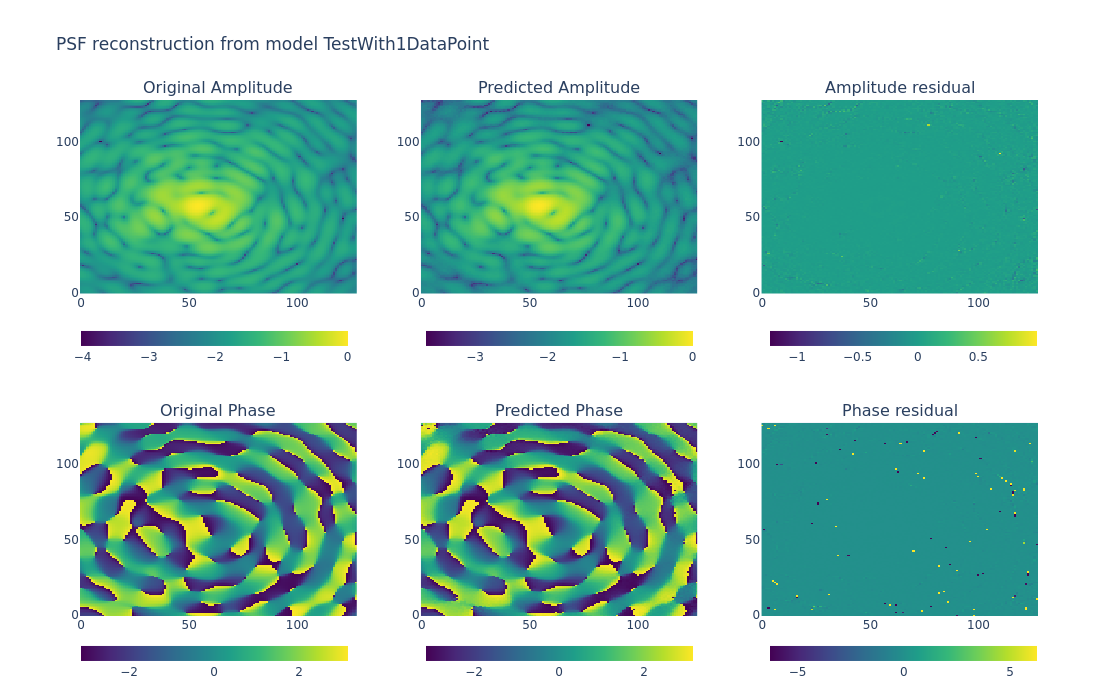

In [10]:
plot_amplitude_phase_fully_connected_prediction_from_electric_field(model,
                                                                    input_array[0],
                                                                    output_array[0])

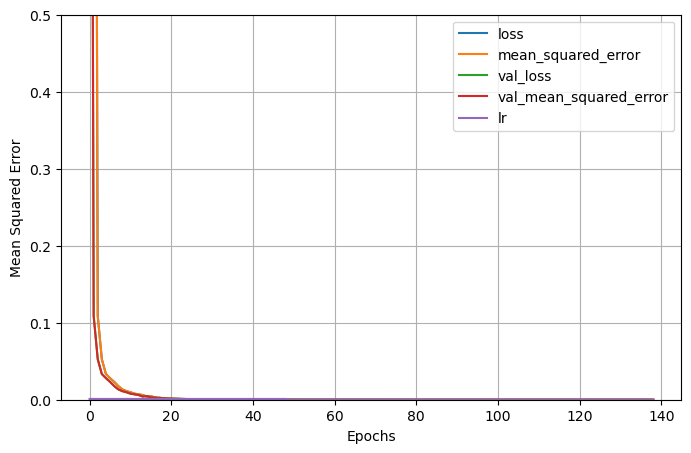

In [11]:
plot_model_history(history)